Analyse a restaurant's performance based on the given data.

##### Dataset 1

- **orderdate**: Date of order placed in <day>-<month>-<year>
- **billnumber**: Unique identifier of receipts 
- **itemdescription**: Specific food order from menu
- **category**: General category that comprises of the food ordered in **item description** 
- **unitprice**: Base price of food ordered without any additional cost
- **quantity**: Number of food ordered
- **subtotal**: Sum of unit price x quantity without hidden costs
- **servicecharge**: Additional charges for services
- **gst**: 7% GST charges on total sum of food
- **foodtotal**: Sum of subtotal + gst
    
##### Dataset 2
- **orderdate**: Date of order placed in <day>-<month>-<year>
- **billnumber**: Unique identifier of receipts 
- **deliverycharge**: Additional charges for delivery on top of bill
- **gst**: 7% GST charges incurred on delivery charges
- **deliverytotal**: Sum of deliverycharge + gst
- **paymentmode**: Mode of payment
- **deliverytimetaken**: Time taken for food to be delivered from customer ordered time to food received in mins
- **customerrating-food**: Customer's rating for food in the scale of 1-5
- **customerrating-delivery**: Customer's rating for delivery in the scale of 1-5

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
# Constants
NUM_TOP = 6
SALES_VOLUME = 'sales_volume'
SALES_VOLUME_LABEL = 'Sales Volume'
REVENUE = 'revenue'
REVENUE_LABEL = REVENUE[0].upper() + REVENUE[1:].lower()
REVENUE_UNIT = '$'
MONTHS = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Get plot labels for each type of graph
def getTopTypeLabel(topType):
    if (topType == SALES_VOLUME): return SALES_VOLUME_LABEL
    if (topType == REVENUE): return REVENUE_LABEL
    return ""

def getTopTypeUnit(topType):
    if (topType == REVENUE): return REVENUE_UNIT
    return ""

def getTopTypeUnitLabel(topType):
    result = getTopTypeUnit(topType)
    return f" ({result})" if len(result) > 0 else ""

def getTopTypeHeader(topType):
    if (topType == REVENUE): return'subtotal'
    if (topType == SALES_VOLUME): return 'quantity'
    return ""

# Data Processing

In [3]:
# Overview
dataset1 = pd.read_csv('data\dataset1.csv', encoding='utf-8')
dataset1

,orderdate,billnumber,itemdesription,category,unitprice,quantity,subtotal,servicecharge,gst,foodtotal
0,2-Jan-22,D0201202210000,Aglio Olio [Prawn],Mains & Pastas,$25.95,2,$51.90,$5.19,$4.00,$61.09
1,2-Jan-22,D0201202210000,Aglio Olio [Regular],Mains & Pastas,$18.95,2,$37.90,$3.79,$2.92,$44.61
2,2-Jan-22,D0201202210000,Amuse de Zélande (6pcs) [Dutch],Oysters,$35.70,2,$71.40,$7.14,$5.50,$84.04
3,2-Jan-22,D0201202210000,Angus Burger [Portobello Mushroom with Truffle...,Takeaway Favourites,$23.90,2,$47.80,$4.78,$3.68,$56.26
4,2-Jan-22,D0201202210001,Premium Fish Fillets [Kingfish],Mains & Pastas,$26.95,2,$53.90,$5.39,$4.15,$63.44
...,...,...,...,...,...,...,...,...,...,...
23034,2-Feb-23,D0202202310538,Boston Lobster [Steam],Mains & Pastas,$59.95,2,$119.90,$11.99,$10.55,$142.44
23035,2-Feb-23,D0202202310539,Family Pack B [Hot Seafood Platter | Fish & Ch...,Platters & Packs,$178.00,1,$178.00,$17.80,$15.66,$211.46
23036,2-Feb-23,D0202202310539,Family Pack C [Chargrilled Snapper | Aglio Oli...,Platters & Packs,$178.00,1,$178.00,$17.80,$15.66,$211.46
23037,2-Feb-23,D0202202310539,Fine de Claire No.3 (6pcs) [France],Oysters,$29.70,1,$29.70,$2.97,$2.61,$35.28


In [4]:
dataset2 = pd.read_csv('data\dataset2.csv', encoding='utf-8')
dataset2

,orderdate,billnumber,deliverycharge,gst,deliverytotal,paymentmode,deliverytimetaken,customerrating-food,customerrating-delivery
0,2-Jan-22,D0201202210000,$17.00,$1.19,$18.19,Cash on Delivery,25,5,5
1,2-Jan-22,D0201202210001,$17.00,$1.19,$18.19,Debit Card,25,5,5
2,2-Jan-22,D0201202210002,$26.00,$1.82,$27.82,Credit Card,38,4,3
3,2-Jan-22,D0201202210003,$17.00,$1.19,$18.19,Debit Card,25,4,4
4,2-Jan-22,D0201202210004,$17.00,$1.19,$18.19,Credit Card,25,4,4
...,...,...,...,...,...,...,...,...,...
5776,2-Feb-23,D0202202310535,$32.00,$2.56,$34.56,Debit Card,48,3,3
5777,2-Feb-23,D0202202310536,$25.00,$2.00,$27.00,Debit Card,37,4,5
5778,2-Feb-23,D0202202310537,$15.00,$1.20,$16.20,Credit Card,22,4,5
5779,2-Feb-23,D0202202310538,$18.00,$1.44,$19.44,Debit Card,26,5,4


In [5]:
# Overview of datatypes
dataset1.dtypes

orderdate         object
billnumber        object
itemdesription    object
category          object
unitprice         object
quantity           int64
subtotal          object
servicecharge     object
gst               object
foodtotal         object
dtype: object

In [6]:
dataset2.dtypes

orderdate                  object
billnumber                 object
deliverycharge             object
gst                        object
deliverytotal              object
paymentmode                object
deliverytimetaken           int64
customerrating-food         int64
customerrating-delivery     int64
dtype: object

In [7]:
# Check for empty values
dataset1.isnull().any()

orderdate         False
billnumber        False
itemdesription    False
category          False
unitprice         False
quantity          False
subtotal          False
servicecharge     False
gst               False
foodtotal         False
dtype: bool

In [8]:
dataset2.isnull().any()

orderdate                  False
billnumber                 False
deliverycharge             False
gst                        False
deliverytotal              False
paymentmode                False
deliverytimetaken          False
customerrating-food        False
customerrating-delivery    False
dtype: bool

In [9]:
# Check min/max for outliers
dataset1.describe(include='all', datetime_is_numeric=True).transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
orderdate,23039,384,8-Oct-22,75,NaN,NaN,NaN,NaN,NaN,NaN,NaN
billnumber,23039,5781,D2008202212867,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
itemdesription,23039,95,Angus Burger [Smoked Cheddar],244,NaN,NaN,NaN,NaN,NaN,NaN,NaN
category,23039,7,Mains & Pastas,6792,NaN,NaN,NaN,NaN,NaN,NaN,NaN
unitprice,23039,47,$26.95,2428,NaN,NaN,NaN,NaN,NaN,NaN,NaN
quantity,23039.0,NaN,NaN,NaN,1.515344,0.499775,1.0,1.0,2.0,2.0,2.0
subtotal,23039,93,$53.90,1241,NaN,NaN,NaN,NaN,NaN,NaN,NaN
servicecharge,23039,90,$5.39,1241,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gst,23039,168,$4.15,1131,NaN,NaN,NaN,NaN,NaN,NaN,NaN
foodtotal,23039,186,$63.44,1131,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
dataset2.describe(include='all', datetime_is_numeric=True).transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
orderdate,5781,384,20-Jul-22,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
billnumber,5781,5781,D0201202210000,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
deliverycharge,5781,21,$24.00,606,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gst,5781,39,$1.68,563,NaN,NaN,NaN,NaN,NaN,NaN,NaN
deliverytotal,5781,42,$25.68,539,NaN,NaN,NaN,NaN,NaN,NaN,NaN
paymentmode,5781,3,Credit Card,3069,NaN,NaN,NaN,NaN,NaN,NaN,NaN
deliverytimetaken,5781.0,NaN,NaN,NaN,35.425532,8.128522,21.0,29.0,35.0,41.0,50.0
customerrating-food,5781.0,NaN,NaN,NaN,3.331431,1.25454,1.0,2.0,3.0,4.0,5.0
customerrating-delivery,5781.0,NaN,NaN,NaN,2.975437,1.385822,1.0,2.0,3.0,4.0,5.0


In [11]:
# Type casting, column renaming
dataset1.rename(columns={"itemdesription": "itemdescription"}, inplace=True)
dataset1["orderdate"] = pd.to_datetime(dataset1["orderdate"])
for currency_column in ['unitprice', 'subtotal', 'servicecharge', 'gst', 'foodtotal']:
    dataset1[currency_column] = dataset1[currency_column].str.replace('$', '', regex=True).astype('float')
for str_col in ['billnumber', 'itemdescription', 'category']:
    dataset1[str_col] = dataset1[str_col].astype(str)

In [12]:
dataset2.rename(
    columns={
        "customerrating-food": "customerrating_food",
        "customerrating-delivery": "customerrating_delivery"
    },
    inplace=True)
dataset2["orderdate"] = pd.to_datetime(dataset2["orderdate"])
for currency_column in ['deliverycharge', 'deliverytotal', 'gst']:
    dataset2[currency_column] = dataset2[currency_column].astype(str).str.replace('$', '', regex=True).astype('float')
for str_col in ['billnumber', 'paymentmode']:
    dataset2[str_col] = dataset2[str_col].astype(str)

In [13]:
# Group variants of same item together
def combineDescriptions(df):
    df_combined_description = df.copy()
    df_combined_description["itemdescription"] = df_combined_description["itemdescription"] \
        .str \
        .replace('[ ]*\[[A-Za-z0-9 -|_]+\]', '', regex=True)
    return df_combined_description

df1_combined_description = combineDescriptions(dataset1)

for cat in df1_combined_description.category.unique():
    print(f"{cat}:")
    for idx, item in enumerate(
        df1_combined_description[df1_combined_description.category == cat] \
        .itemdescription.sort_values() \
        .unique()
    ):
        print(f"{idx+1}. {item}")
    print()

Mains & Pastas:
1. Aglio Olio
2. Barramundi Fish Fillets
3. Boston Lobster
4. Clam Vongole
5. Hot Smoked Salmon
6. Lobster & Crab Risotto
7. Ocean Trout Fish Fillets
8. Pizza
9. Premium Fish Fillets
10. Red Snapper Fish Fillets
11. Russian King Crab Legs
12. Salmon Fish Fish Fillets
13. Scallop Cioppino Spaghetti
14. Seafood Linguini
15. Spicy Tomato Marinara Linguini
16. Squid Ink Linguini
17. Truffle Risotto
18. Yellowfin Tuna Fish Fillets

Oysters:
1. Amuse de Zélande (6pcs)
2. Aquanostra (6pcs)
3. Barron Point (6pcs)
4. Dutch Creuses No.1 (6pcs)
5. Dutch X.O (6pcs)
6. Fine de Claire No.3 (6pcs)
7. Grevelingen (6pcs)
8. KYS Specials No.3 (6pcs)
9. KYS Super Specials No.1 (6pcs)
10. Kujukushima (6pcs)
11. Mary Point (6pcs)
12. Ostra Regal Specials No 3 (6pcs)
13. Salgado (6pcs)

Takeaway Favourites:
1. Angus Burger
2. Barramundi Fish & Chips
3. Black Cod Fish & Chips
4. Calamari
5. Grilled Spanish Octopus
6. House Fish & Chips
7. Pan Seared Crab Cakes
8. Seafood Basket
9. Seafood Mar

In [14]:
# Merge datasets
df_main = dataset1[[
    'orderdate',
    'billnumber',
    'itemdescription',
    'category',
    'unitprice',
    'quantity',
    'subtotal',
    'foodtotal'
]].merge(
    dataset2[[
        'billnumber',
        'deliverycharge',
        'deliverytotal',
        'paymentmode',
        'deliverytimetaken',
        'customerrating_food',
        'customerrating_delivery'
    ]],
    how='outer',
    on='billnumber'
).reset_index()

df_main_combined_description = combineDescriptions(df_main).drop(columns=['index'], axis=1)

df_main

# Other checks
# df_main.isnull().any()
# df_main.describe(include='all', datetime_is_numeric=True).transpose()
# df_main.dtypes
# print(f"{len(df_main)}, {len(dataset1)}, {len(dataset2)}")

,index,orderdate,billnumber,itemdescription,category,unitprice,quantity,subtotal,foodtotal,deliverycharge,deliverytotal,paymentmode,deliverytimetaken,customerrating_food,customerrating_delivery
0,0,2022-01-02,D0201202210000,Aglio Olio [Prawn],Mains & Pastas,25.95,2,51.9,61.09,17.0,18.19,Cash on Delivery,25,5,5
1,1,2022-01-02,D0201202210000,Aglio Olio [Regular],Mains & Pastas,18.95,2,37.9,44.61,17.0,18.19,Cash on Delivery,25,5,5
2,2,2022-01-02,D0201202210000,Amuse de Zélande (6pcs) [Dutch],Oysters,35.70,2,71.4,84.04,17.0,18.19,Cash on Delivery,25,5,5
3,3,2022-01-02,D0201202210000,Angus Burger [Portobello Mushroom with Truffle...,Takeaway Favourites,23.90,2,47.8,56.26,17.0,18.19,Cash on Delivery,25,5,5
4,4,2022-01-02,D0201202210001,Premium Fish Fillets [Kingfish],Mains & Pastas,26.95,2,53.9,63.44,17.0,18.19,Debit Card,25,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23034,23034,2023-02-02,D0202202310538,Boston Lobster [Steam],Mains & Pastas,59.95,2,119.9,142.44,18.0,19.44,Debit Card,26,5,4
23035,23035,2023-02-02,D0202202310539,Family Pack B [Hot Seafood Platter | Fish & Ch...,Platters & Packs,178.00,1,178.0,211.46,30.0,32.40,Debit Card,44,1,1
23036,23036,2023-02-02,D0202202310539,Family Pack C [Chargrilled Snapper | Aglio Oli...,Platters & Packs,178.00,1,178.0,211.46,30.0,32.40,Debit Card,44,1,1
23037,23037,2023-02-02,D0202202310539,Fine de Claire No.3 (6pcs) [France],Oysters,29.70,1,29.7,35.28,30.0,32.40,Debit Card,44,1,1


# Data Analysis

## 1. Overview

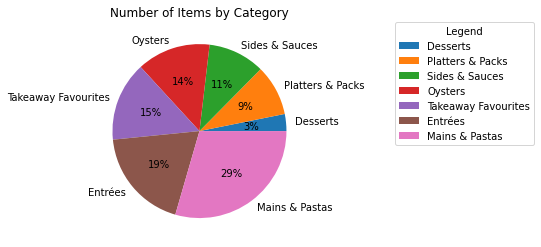

In [15]:
df1_category_group = dataset1.groupby("category")["category"].count().sort_values()

ax = plt.pie(
    df1_category_group.values,
    labels=df1_category_group.index,
    autopct='%.0f%%',
)
plt.title("Number of Items by Category")
plt.legend(
    title="Legend",
    labels=df1_category_group.index,
    bbox_to_anchor=(1.4, 1),
    loc='upper left',
    borderaxespad=0
)
plt.show()

## 2. Sales

In [16]:
# Find top sellers by sales volume
def findTopSellersByCategory(category=None):
    df = df1_combined_description if category is None else df1_combined_description[df1_combined_description["category"] == category]
    df1_top_sellers = pd.DataFrame()
    df1_top_sellers[SALES_VOLUME] = df \
        .groupby(['category', 'itemdescription'])['quantity'] \
        .sum() \
        .sort_values(ascending=False)

    df1_top_sellers["percentage"] = (df1_top_sellers[SALES_VOLUME] / df1_top_sellers[SALES_VOLUME].sum()) * 100
    return df1_top_sellers.reset_index()

# Find top earners by revenue
def findTopEarnersByCategory(category=None):
    df = df1_combined_description if category is None else df1_combined_description[df1_combined_description["category"] == category]
    df1_top_revenue = pd.DataFrame()
    df1_top_revenue[REVENUE] = df \
        .assign(temp=df1_combined_description.eval('quantity * unitprice')) \
        .groupby(['category', 'itemdescription'])["temp"] \
        .sum() \
        .sort_values(ascending=False)

    df1_top_revenue["percentage"] = (df1_top_revenue[REVENUE] / df1_top_revenue[REVENUE].sum()) * 100
    return df1_top_revenue.reset_index()

# Find top sellers/earners
def findTopByCategory(topType):
    if (topType == SALES_VOLUME): return findTopSellersByCategory()
    if (topType == REVENUE): return findTopEarnersByCategory()
    return pd.DataFrame()

# Find top-selling/-earning categories
def findTopCategory(topType):
    return dataset1.groupby('category')[getTopTypeHeader(topType)].sum().reset_index()

# Find sales/revenue over time
def findSalesOverTime(topType):
    topTypeCol = getTopTypeHeader(topType)
    
    # Filter out Feb 2023 onwards due to incomplete data
    df1_month_year = df1_combined_description[['orderdate', 'category', 'quantity', 'subtotal']] \
        .query("orderdate < '2023-02-01'")
    df1_month_year['mmyyyy'] = df1_month_year['orderdate'].dt.strftime('%b %Y')
    df1_month_year = df1_month_year \
        .groupby(['mmyyyy', 'category'])[topTypeCol] \
        .sum() \
        .reset_index()
    df1_month_year_total = df1_month_year \
        .groupby('mmyyyy')[topTypeCol] \
        .sum() \
        .reset_index()
    df1_month_year_total['category'] = "Total"
    df1_month_year = pd.concat([df1_month_year, df1_month_year_total])
    return df1_month_year.iloc[pd.to_datetime(df1_month_year['mmyyyy']).values.argsort()]

# Plot bar charts for top sellers and earners
def plotTopBar(topType, df=None, category=None):
    if (df is None): df = findTopByCategory(topType).head(NUM_TOP)

    NUM_COLS = 2
    fig, axes = plt.subplots(1, NUM_COLS, sharey=True, figsize=(10,5))
    sns.barplot(data=df, x="percentage", y="itemdescription", orient='h', ax=axes[0])
    sns.barplot(data=df, x=topType, y="itemdescription", orient='h', ax=axes[1])

    fig.suptitle(
        f"Top Sellers (by {getTopTypeLabel(topType)})"
            if category is None
            else f"Top Sellers - {category} (by {getTopTypeLabel(topType)})"
    )
    axes[0].set_xlabel(f"Percentage of Total {getTopTypeLabel(topType)} (%)")
    axes[1].set_xlabel(f"{getTopTypeLabel(topType)}{getTopTypeUnitLabel(topType)}")
    axes[0].set_ylabel("Item")
    axes[1].set_ylabel("")
    axes[0].set_title("By Percentage")
    axes[1].set_title(f"By {'Quantity' if topType == SALES_VOLUME else getTopTypeLabel(topType)}")
    axes[0].bar_label(axes[0].containers[0], fmt='%.2f%%')
    axes[1].bar_label(axes[1].containers[0], fmt='%.d')
    for i in range(NUM_COLS):
        axes[i].spines[['right', 'top']].set_visible(False)
    plt.show()
    
# Plot line charts for sales/revenue over time
def plotTopLine(topType, df=None):
    y_ax = getTopTypeHeader(topType)
    if (df is None): df = findSalesOverTime(topType)
    
    fig, axes = plt.subplots(1, 2, figsize=(12,5), sharex=True)
    plt.subplots_adjust(wspace=0.3)

    sns.lineplot(data=df[df['category'] == 'Total'], x='mmyyyy', y=y_ax, ci=None, ax=axes[0])
    sns.lineplot(data=df[df['category'] != 'Total'], x='mmyyyy', y=y_ax, hue='category', ci=None, ax=axes[1])

    fig.suptitle(f"{getTopTypeLabel(topType)} Over Time")
    axes[0].set_title("All Items")
    axes[1].set_title("By Category")
    for idx, ax in enumerate(axes):
        ax.set_xlabel("Month")
        ax.set_ylabel(getTopTypeLabel(topType))
        
        xticks = ax.get_xticks()
        xlabels = df['mmyyyy'].unique()
        ax.set_xticks(xticks)
        ax.set_xticklabels(xlabels, rotation=70, rotation_mode='anchor', ha='right')

    plt.legend(
        title="Legend",
        bbox_to_anchor=(1.05, 1),
        loc='upper left',
        borderaxespad=0
    )
    plt.show()
    
# Plot pie charts of sales/revenue by category
def plotTopPie(topType, df=None):
    col = getTopTypeHeader(topType)
    if (df is None): df = findTopCategory(topType)

    ax = plt.pie(
        df[col],
        labels=df['category'].unique(),
        autopct='%.0f%%',
    )
    plt.title(f"{getTopTypeLabel(topType)} by Category")
    plt.legend(
        title="Legend",
        labels=df1_category_group.index,
        bbox_to_anchor=(1.4, 1),
        loc='upper left',
        borderaxespad=0
    )
    plt.show()

### 2.1. Sales Volume

#### 2.1.1. Top Sellers
Q: What are the firm's top sellers by sales volume?

A: The overall top sellers are: 
1. Premium Fish Fillets
2. Angus Burger
3. Pizza
4. Boston Lobster
5. Aglio Olio
6. Sashimi Platter

Note: similar items/dishes are grouped together

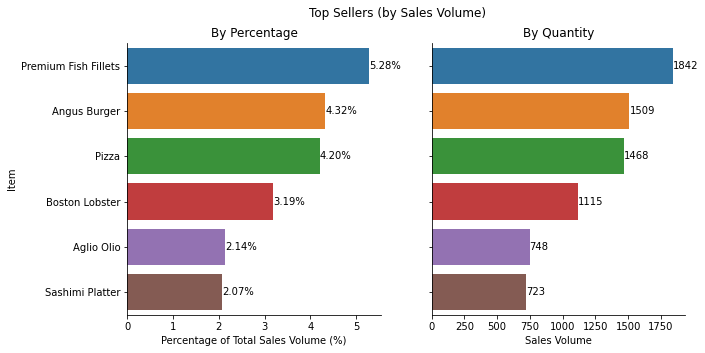

In [17]:
# Top sellers/popularity by quantity (group variants together)
plotTopBar(SALES_VOLUME)

Top Sellers By Category

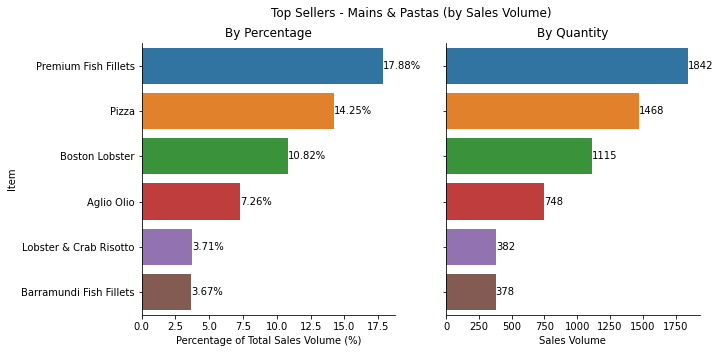

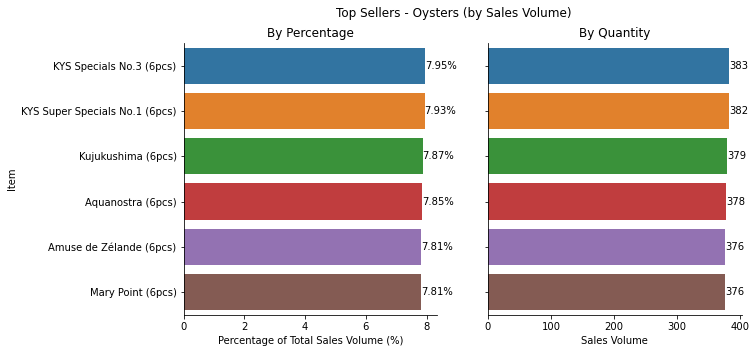

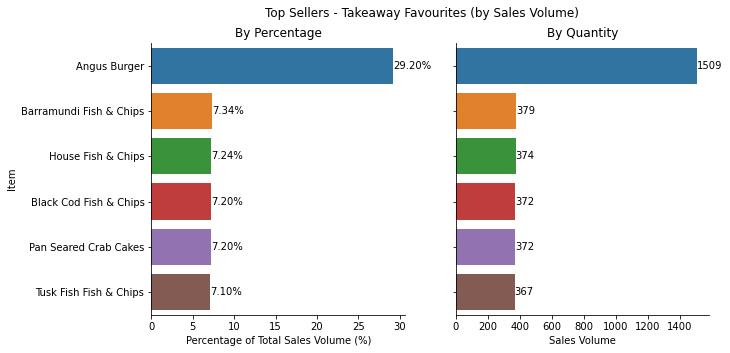

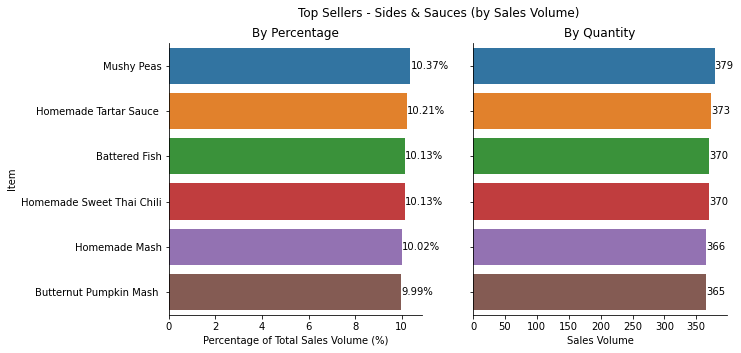

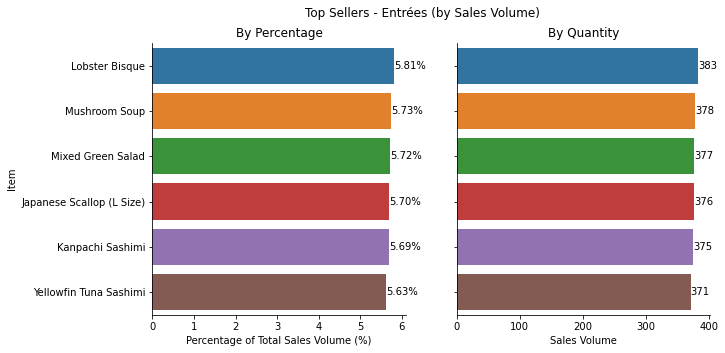

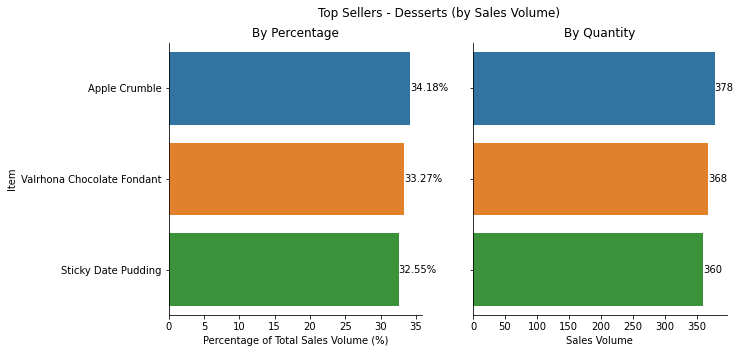

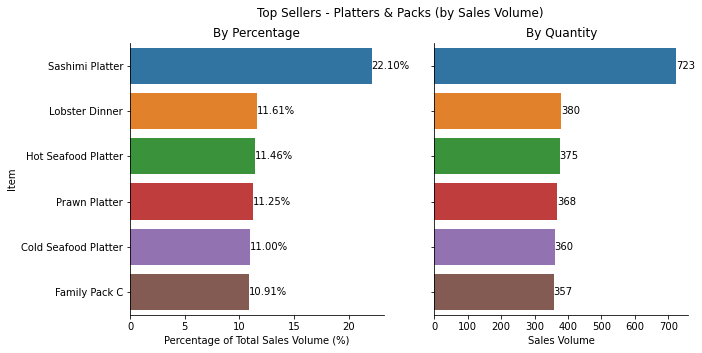

In [18]:
for category in df1_combined_description['category'].unique():
    plotTopBar(SALES_VOLUME, findTopSellersByCategory(category).head(NUM_TOP), category)

#### 2.1.2. Distribution
Q: 
1. By volume, how much does each dish contribute to sales?
2. In particular, how much more popular are the top sellers compared to other dishes?

A:  
1.
- 82% of dishes sold between 350 to 400 units in the given timeframe
- No dish sold less than 354 units
<br>

*Recommendation: Non-top sellers can be removed from the menu without significant impact on overall sales volume.*

2.
- The top 6 selling dishes contributed to 41% of sales by volume
- Item in 6th place sold around twice as many plates as the next-placed item
<br>

*Recommendation: When deciding on planned inventory (e.g. ingredients, equipment), the firm should take note of and plan around the top-selling dishes, given they are likely to require the most inventory to produce.*

Note: similar items/dishes are grouped together

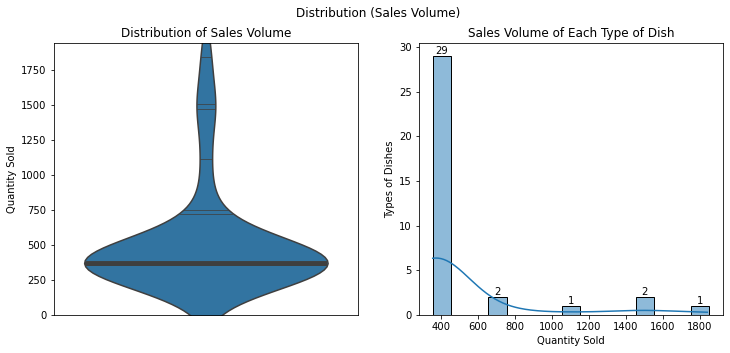

In [19]:
df1_amount_sold = findTopSellersByCategory() \
    .groupby([SALES_VOLUME])[SALES_VOLUME] \
    .count() \
    .to_frame(name="count") \
    .sort_values(by=SALES_VOLUME, ascending=True) \
    .reset_index()

fig, axes = plt.subplots(1, 2, figsize=(12,5))

sns.violinplot(data=df1_amount_sold, y=SALES_VOLUME, inner="stick", ax=axes[0])
sns.histplot(data=df1_amount_sold, x=SALES_VOLUME, binwidth=100, kde=True, ax=axes[1])

fig.suptitle(f"Distribution ({getTopTypeLabel(SALES_VOLUME)})")
axes[0].set_title(f"Distribution of {getTopTypeLabel(SALES_VOLUME)}")
axes[1].set_title(f"{getTopTypeLabel(SALES_VOLUME)} of Each Type of Dish")
axes[0].set(ylim=(0, df1_amount_sold.at[df1_amount_sold.index[-1], SALES_VOLUME]+100))
axes[0].set_xlabel("")
axes[0].set_xticks([])
axes[1].set_xlabel("Quantity Sold")
axes[0].set_ylabel("Quantity Sold")
axes[1].set_ylabel("Types of Dishes")
hist_labels = [str(v) if v else '' for v in axes[1].containers[0].datavalues]
axes[1].bar_label(axes[1].containers[0], labels=hist_labels)
plt.show()

In [20]:
df1_amount_sold.sort_values(by=SALES_VOLUME, ascending=False, inplace=True)
print(
    "The top {num_top} selling dishes contributed to {percent:.2f}% of sales".format(
        num_top=NUM_TOP,
        percent=df1_amount_sold[SALES_VOLUME].head(NUM_TOP).sum() / df1_amount_sold[SALES_VOLUME].sum() * 100
    )
)

The top 6 selling dishes contributed to 40.96% of sales


In [21]:
df1_amount_sold.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
sales_volume,35.0,516.542857,373.489219,354.0,362.5,371.0,379.5,1842.0
count,35.0,2.314286,1.345394,1.0,1.0,2.0,3.0,6.0


#### 2.1.3. Time
Q: What are the firm's sales over time?

A:
- Increase in sales from Jan to Jul 2022
- Sales levelled off from Jul 2022 onwards
- Largely driven by Mains & Pastas

*Possible explanation: relaxing of COVID-19 measures*

*Recommendations: to further increase sales, the firm could shift towards increase delivery sales, which requires more marketing and adaptation (e.g. dish suitability for deliveries, pricing)*

Note: Data for Feb 2023 is incomplete and therefore was excluded

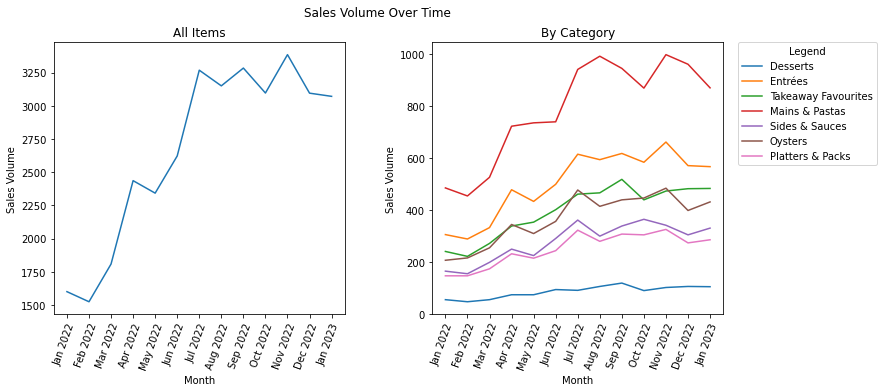

In [22]:
plotTopLine(SALES_VOLUME)

#### 2.1.4. By Category
Q: What how much does each category contribute to sales volume?

A: Mains form the bulk of sales while desserts sell very few units

*Recommendations:*
- *Adjust inventory holdings required for each category according to sales*
- *Market Mains & Pastas more*
- *Improve dessert quality, variety (only 3 options), attractiveness (e.g. menu design, product placement), etc.*

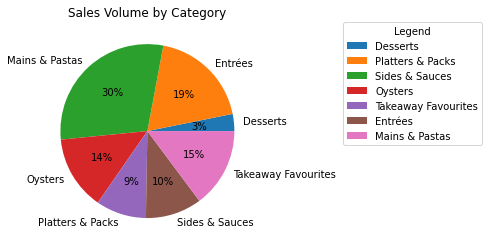

In [23]:
plotTopPie(SALES_VOLUME)

### 2.2. Revenue

#### 2.2.1. Top Earners
Q: What are the firm's top earners by pre-tax revenue?

A: The top earners are: 
1. Lobster Dinner
2. Boston Lobster
3. Family Pack C
4. Family Pack B
5. Premium Fish Fillets
6. Pizza

*Recommendation: Top sellers are not the same as top earners. Firm should seek to cut cost or even raise prices of top sellers to increase profits (cost data required to make further analysis).*

Note: similar items/dishes are grouped together<br>
Note: revenue is calculated pre-tax

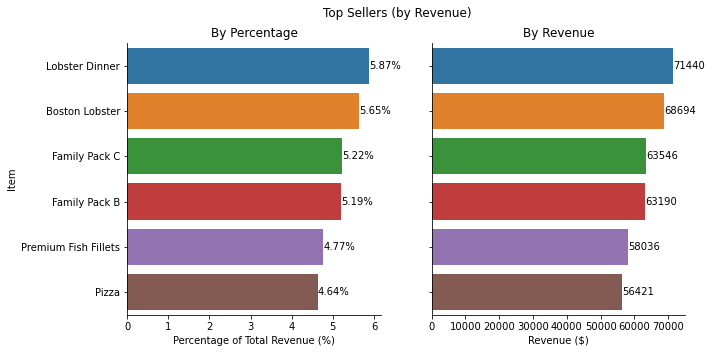

In [24]:
plotTopBar(REVENUE)

Top Earners By Category

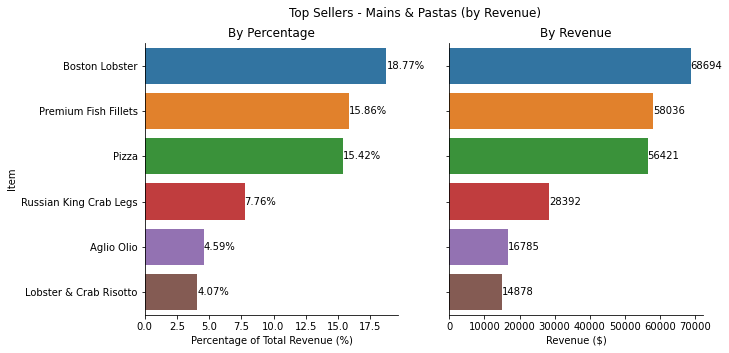

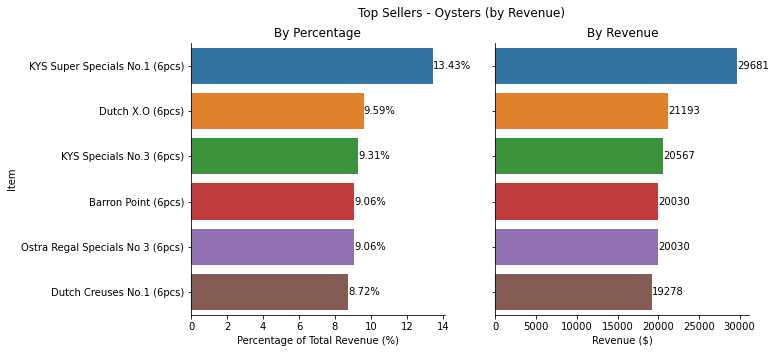

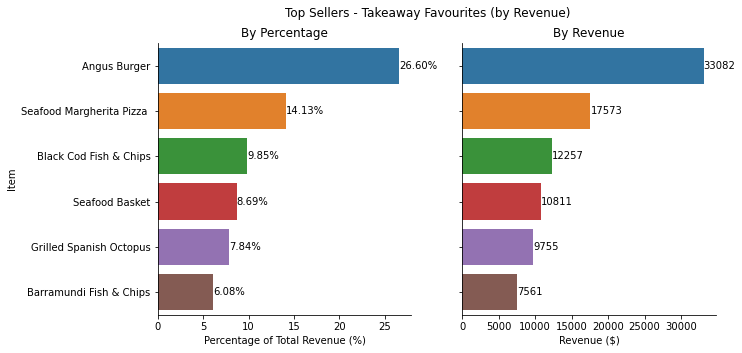

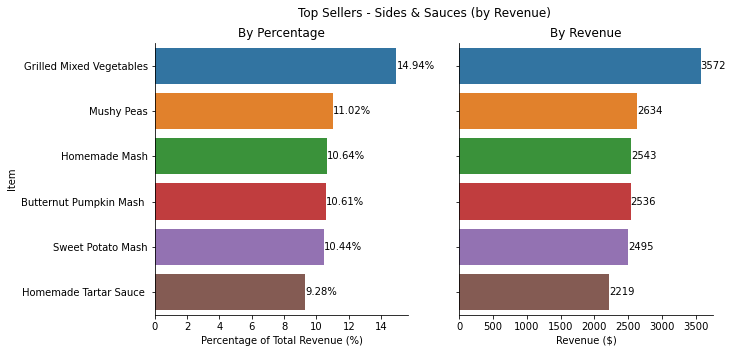

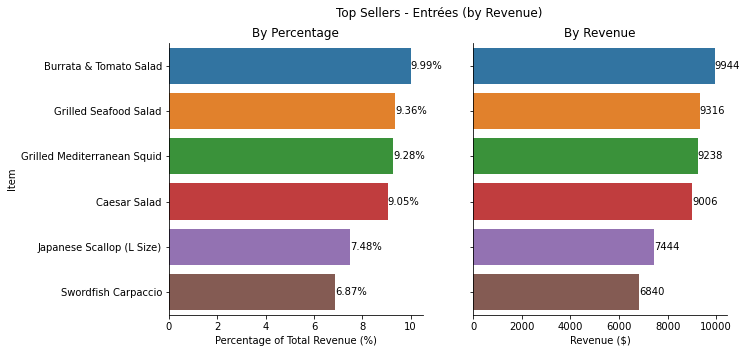

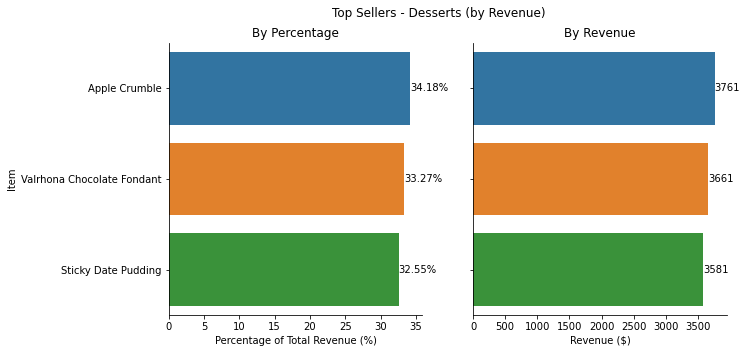

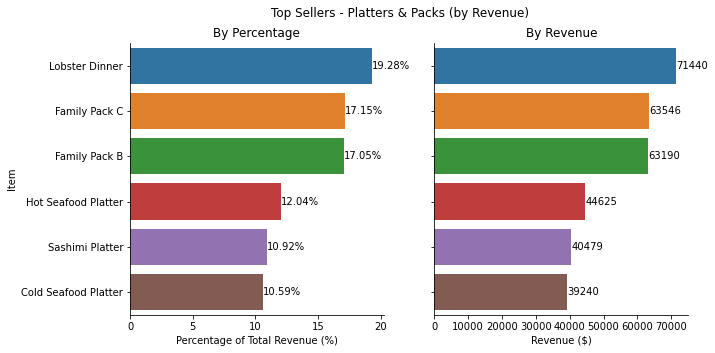

In [25]:
for category in df1_combined_description['category'].unique():
    plotTopBar(REVENUE, findTopEarnersByCategory(category).head(NUM_TOP), category)

#### 2.2.2. Distribution
Q: 
1. How much does each dish contribute to pre-tax revenue?
2. In particular, how much more revenue do the top earners bring in compared to other dishes?

A:  
1. 84% of dishes generated less than \$25000 in the given timeframe
2. The top 6 earning dishes contributed to 31% of sales by volume
<br>

*Observation: The firm has many small-ticket dishes and items (e.g. condiments) alongside a few heavier-hitting top earners.*

Note: similar items/dishes are grouped together<br>
Note: revenue is calculated pre-tax

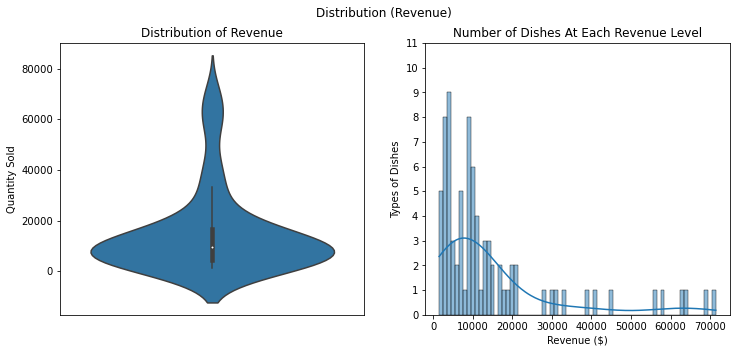

In [26]:
df1_top_revenue = findTopEarnersByCategory()

fig, axes = plt.subplots(1, 2, figsize=(12,5))

sns.violinplot(data=df1_top_revenue, y="revenue", inner="box", ax=axes[0])
sns.histplot(data=df1_top_revenue, x=REVENUE, binwidth=1000, kde=True, ax=axes[1])

fig.suptitle(f"Distribution ({getTopTypeLabel(REVENUE)})")
axes[0].set_title(f"Distribution of {getTopTypeLabel(REVENUE)}")
axes[1].set_title(f"Number of Dishes At Each {getTopTypeLabel(REVENUE)} Level")
axes[0].set_xlabel("")
axes[0].set_xticks([])
axes[1].set_yticks(range(int(max(axes[1].get_yticks())+2)))
axes[1].set_xlabel(f"{getTopTypeLabel(REVENUE)}{getTopTypeUnitLabel(REVENUE)}")
axes[0].set_ylabel("Quantity Sold")
axes[1].set_ylabel("Types of Dishes")
plt.show()

In [27]:
df1_top_revenue.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
revenue,81.0,15017.569753,16608.395103,1461.500000,4266.500000,9393.900000,16785.600000,71440.000000
percentage,81.0,1.234568,1.365347,0.120147,0.350741,0.772256,1.379915,5.872956


In [28]:
df1_top_revenue.sort_values(by='percentage', ascending=False, inplace=True)
print(
    "The top {num_top} earning dishes contributed to {percent:.2f}% of revenue".format(
        num_top=NUM_TOP,
        percent=df1_top_revenue["percentage"].head(NUM_TOP).sum()
    )
)
REVENUE_CUTOFF = 25000
print(
    "{percent:.2f}% of items generated revenue below ${cutoff}".format(
        percent=(df1_top_revenue[df1_top_revenue["revenue"] < REVENUE_CUTOFF].count() / df1_top_revenue.count())["revenue"] * 100,
        cutoff=REVENUE_CUTOFF
    )
)

The top 6 earning dishes contributed to 31.35% of revenue
83.95% of items generated revenue below $25000


#### 2.2.3. Time
*Same as 2.1.3*

Q: What are the firm's revenue over time?

A:
- Increase in sales from Jan to Jul 2022
- Sales levelled off from Jul 2022 onwards
- Largely driven by Mains & Pastas

*Possible explanation: relaxing of COVID-19 measures*

*Recommendations: to further increase revenue, the firm could shift towards increase sales via delivery, which requires more marketing and adaptation (e.g. dish suitability for deliveries, pricing)*

Note: Data for Feb 2023 is incomplete and therefore was excluded

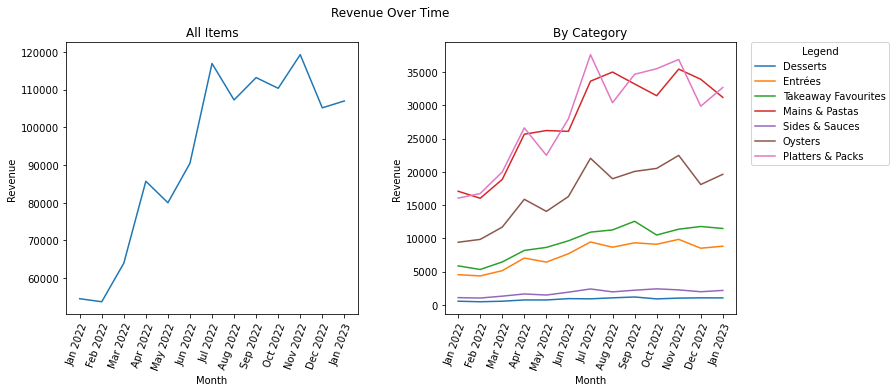

In [29]:
plotTopLine(REVENUE)

#### 2.2.4. By Category
Q: What how much does each category contribute to revenue?

A: Mains and platters form the bulk of revenue while desserts contribute little to revenue

*Recommendations:*
- *Attempt to attract more groups (e.g. families) Platters & Packs bring more revenue per unit sold (need cost data to calculate profitability)*
- *Improve dessert quality, variety (only 3 options), attractiveness (e.g. menu design, product placement), etc.*

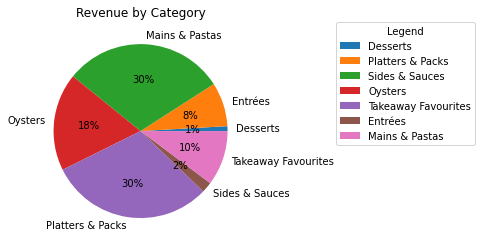

In [30]:
plotTopPie(REVENUE)

### 2.3. Orders

#### 2.3.1. Group Spending
Q: Per person, do groups spend more than individuals (pre-tax)?<br>Assume a bill belongs to a group if it contains more than one item in any category except Sides & Sauces, and the number of persons in a group depends on the number certain categories of dishes ordered:
- Category A
    - Platters & Packs: 4 pax
    - Takeaway Favourites, Mains & Pastas: 1 pax
- Category B (only adds to headcount if no items from Category A; take highest value of either, does not overlap)
    - Entrées
    - Desserts
- Category C (only adds to headcount if no items from Category A and B)
    - Oysters

A: Groups spend almost twice as much ($60) per head than individual diners.

*Recommendation: Seek to cater more to groups.*

Note: for more accurate analysis, additional data in the form of number of persons per bill needs to be collected<br>
Note: revenue is calculated pre-tax

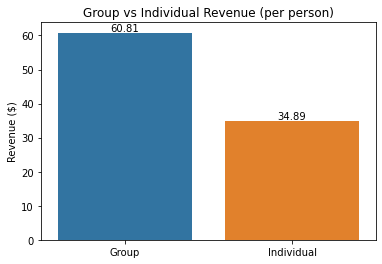

In [31]:
group_bills = df1_combined_description[['billnumber', 'category', 'quantity', 'itemdescription']] \
    [
        (df1_combined_description['category'] != 'Sides & Sauces') & \
        (
            df1_combined_description['quantity'] > 1 | \
            df1_combined_description['itemdescription'].str.contains('Family', na=False)
        )
    ]['billnumber'] \
    .unique()

def getTotalRevenueDf(group=True):
    return df1_combined_description[
        df1_combined_description['billnumber'].isin(group_bills)
            if group
            else ~df1_combined_description['billnumber'].isin(group_bills)
    ]

def getTotalRevenue(df=None, group=True):
    if (df is None): df = getTotalRevenueDf(group)
    return float(df['subtotal'].sum())

group_bills_df, individual_bills_df = (getTotalRevenueDf(), getTotalRevenueDf(False))

category_class = {
    'a': ['Platters & Packs', 'Takeaway Favourites', 'Mains & Pastas'],
    'b': ['Entrées', 'Desserts'],
    'c': ['Oysters']
}
group_headcount = 0

for bill_no in group_bills:
    bill_df = group_bills_df[group_bills_df['billnumber'] == bill_no]
    for cat_class, cat_arr in category_class.items():
        res = bill_df[bill_df['category'].isin(cat_arr)].groupby('billnumber')['quantity'].sum().get(key=bill_no)
        if (res is not None):
            group_headcount += res
            break

group_bills_data = {
    'Group': getTotalRevenue(group_bills_df) / group_headcount,
    'Individual': getTotalRevenue(df=individual_bills_df, group=False) / individual_bills_df.groupby('billnumber')['billnumber'].count().sum()
}

ax = sns.barplot(x=list(group_bills_data.keys()), y=list(group_bills_data.values()))

ax.set_title(f"Group vs Individual {getTopTypeLabel(REVENUE)} (per person)")
ax.set_xlabel("")
ax.set_xticklabels(group_bills_data.keys())
ax.set_ylabel(f"{getTopTypeLabel(REVENUE)}{getTopTypeUnitLabel(REVENUE)}")
ax.bar_label(ax.containers[0], fmt='%.2f')
plt.show()

#### 2.3.2. Order Composition
Q:
1. Per bill, do how many categories do customers order from?
2. What are the most common categories of dishes ordered together?
3. What are the most common pairings of categories of dishes ordered together?
3. What are the least common pairings of categories of dishes ordered together?

A:
1. All bills consist of items from 3 to 5 categories; 89% of bills consist of items from at least 4 categories
2. Top 6 categories of items ordered together (all combinations):
    1. Entrées, Mains & Pastas, Oysters
    2. Entrées, Oysters, Platters & Packs
    3. Mains & Pastas, Oysters, Sides & Sauces, Takeaway Favourites
    4. Entrées, Mains & Pastas, Takeaway Favourites
    5. Mains & Pastas, Oysters, Takeaway Favourites
    6. Entrées, Mains & Pastas, Sides & Sauces
3. Top 6 categories of items ordered together (pairs only):
    1. Entrées + Mains & Pastas
    2. Mains & Pastas + Takeaway Favourites
    3. Mains & Pastas + Oysters
    4. Mains & Pastas + Sides & Sauces
    5. Entrées + Oysters
    6. Entrées + Takeaway Favourites
    
4. Bottom 6 combinations (lowest to highest):
	1. Sides & Sauces
	2. Platters & Packs
	3. Oysters
	4. Takeaway Favourites
	5. Mains & Pastas
	6. Desserts + Oysters

*Recommendations:*
- *From 1: There may be an appetite to order items from a variety of categories. Together with data from sections 2.1.4 and 2.2.4, this suggests that the firm should focus more on improving the attractiveness and/or quality of less popular items (such as desserts) due to the room for growth in this area.*
- *From 2 & 3: Due to the high popularity of these combinations, the firm could seek to further strengthen sales in these areas by offering promotions from these two categories.*
- *From 4:*
    - *Else, due to survivorship bias (with regard to 2 & 3), perhaps there is more room for growth for the least common pairings, and the firm would like to encourage this combination of orders by offering promotions/sets for these categories.*
    - *Note that 4 out of the bottom 5 are purely from 1 category; this implies customers prefer variety when ordering, meaning that it is worth for firms to improve the appeal (quality and variety) of items in every category (see sections 2.1.4 and 2.2.4) and even market items from various categories together.*

In [32]:
df1_bill_category_sorted = dataset1[['billnumber', 'category']].sort_values(by='category')

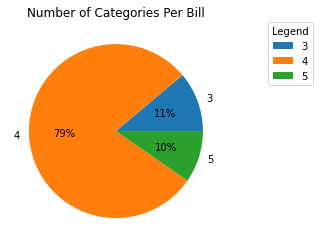

In [33]:
df1_bill_category_count = df1_bill_category_sorted.groupby('billnumber').count().reset_index().groupby('category').count().reset_index()

ax = plt.pie(
    df1_bill_category_count['billnumber'],
    labels=df1_bill_category_count['category'],
    autopct='%.0f%%',
)
plt.title("Number of Categories Per Bill")
plt.legend(
    title="Legend",
    labels=df1_bill_category_count['category'],
    bbox_to_anchor=(1.2, 1),
    loc='upper left',
    borderaxespad=0
)
plt.show()

In [34]:
df1_category_combos = df1_bill_category_sorted \
    .drop_duplicates() \
    .groupby('billnumber', as_index=False)['category'] \
    .transform(lambda x: ', '.join(x)) \
    .groupby('category')['category'] \
    .count() \
    .sort_values(ascending=False) \
    .rename('count') \
    .reset_index()
df1_category_combos_sum = df1_category_combos['count'].sum()
df1_category_combos["percentage"] = (df1_category_combos['count'] / df1_category_combos_sum) * 100
df1_category_top_combos = df1_category_combos.head(NUM_TOP)

for i, j in enumerate(df1_category_top_combos["category"].values):
    print(f"{i+1}. {j}")

1. Entrées, Mains & Pastas, Oysters
2. Entrées, Oysters, Platters & Packs
3. Mains & Pastas, Oysters, Sides & Sauces, Takeaway Favourites
4. Entrées, Mains & Pastas, Takeaway Favourites
5. Mains & Pastas, Oysters, Takeaway Favourites
6. Entrées, Mains & Pastas, Sides & Sauces


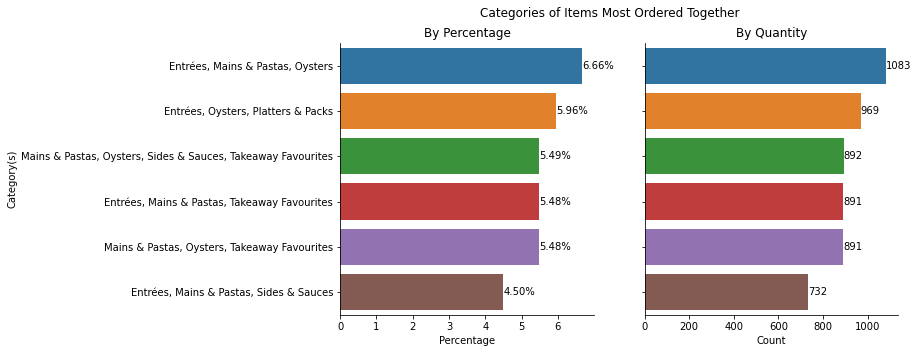

In [35]:
NUM_COLS = 2
fig, axes = plt.subplots(1, NUM_COLS, sharey=True, figsize=(10,5))
sns.barplot(data=df1_category_top_combos, x="percentage", y="category", orient='h', ax=axes[0])
sns.barplot(data=df1_category_top_combos, x='count', y="category", orient='h', ax=axes[1])

fig.suptitle("Categories of Items Most Ordered Together")
axes[0].set_xlabel('Percentage')
axes[1].set_xlabel("Count")
axes[0].set_ylabel("Category(s)")
axes[1].set_ylabel("")
axes[0].set_title("By Percentage")
axes[1].set_title("By Quantity")
axes[0].bar_label(axes[0].containers[0], fmt='%.2f%%')
axes[1].bar_label(axes[1].containers[0], fmt='%.d')
for i in range(NUM_COLS):
    axes[i].spines[['right', 'top']].set_visible(False)
plt.show()

In [36]:
result = {}
for idx, row in df1_category_combos[['category', 'count']].iterrows():
    categories = row["category"].split(", ")
    categories_len = len(categories)
    if (categories_len > 1):
        for idx, cat in enumerate(categories):
            for cat2idx in range(idx+1, categories_len):
                key = f"{cat} + {categories[cat2idx]}"
                result[key] = result.get(key, 0) + row['count']
    else:
        result[categories[0]] = result.get(categories[0], 0) + row['count']

df1_category_pairs = pd.DataFrame(result.items(), columns=['category', 'count']) \
    .sort_values(by='count', ascending=False)
df1_category_pairs_sum = df1_category_pairs['count'].sum()
df1_category_pairs["percentage"] = (df1_category_pairs['count'] / df1_category_pairs_sum) * 100
df1_category_pairs_top = df1_category_pairs.head(NUM_TOP)
df1_category_pairs_bottom = df1_category_pairs.sort_values(by='count').head(NUM_TOP)

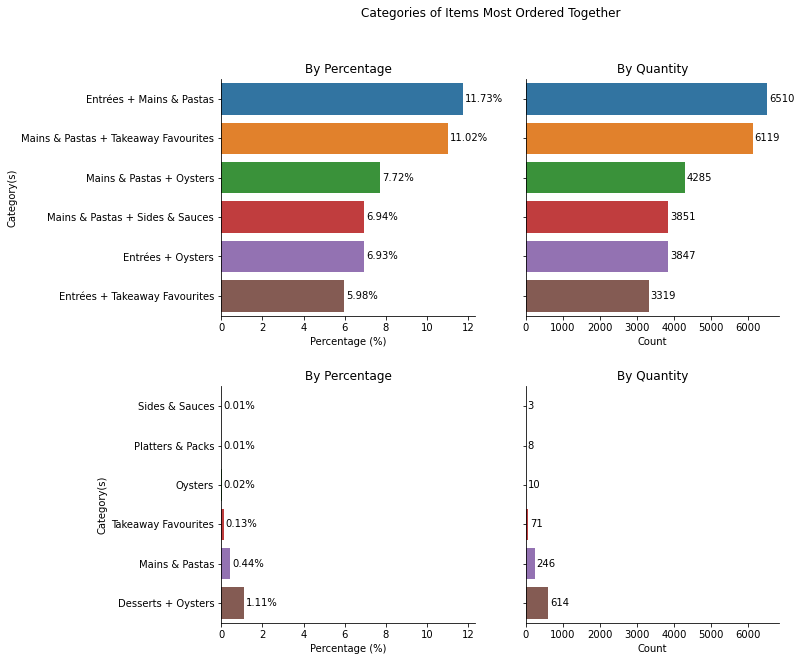

Top 6 pairs of categories per bill (highest to lowest):
	1. Entrées + Mains & Pastas
	2. Mains & Pastas + Takeaway Favourites
	3. Mains & Pastas + Oysters
	4. Mains & Pastas + Sides & Sauces
	5. Entrées + Oysters
	6. Entrées + Takeaway Favourites

Bottom 6 pairs of categories per bill (lowest to highest):
	1. Sides & Sauces
	2. Platters & Packs
	3. Oysters
	4. Takeaway Favourites
	5. Mains & Pastas
	6. Desserts + Oysters


In [37]:
NUM_ROWS = 2
NUM_COLS = 2
fig, axes = plt.subplots(NUM_ROWS, NUM_COLS, sharex='col', sharey='row', figsize=(10,10))
fig.suptitle("Categories of Items Most Ordered Together")

for i in range(NUM_ROWS):
    for j in range(NUM_COLS):
        axes[i][j].spines[['right', 'top']].set_visible(False)

for i in range(NUM_ROWS):
    for j, col in enumerate(['percentage', 'count']):
        sns.barplot(
            data=df1_category_pairs_top if i == 0 else df1_category_pairs_bottom,
            x=col,
            y='category',
            orient='h',
            ax=axes[i][j]
        )

for j in range(NUM_ROWS):
    axes[j][0].set_xlabel('Percentage (%)')
    axes[j][1].set_xlabel("Count")
    axes[j][0].set_ylabel("Category(s)")
    axes[j][1].set_ylabel("")
    axes[j][0].set_title("By Percentage")
    axes[j][1].set_title("By Quantity")
    axes[j][0].bar_label(axes[j][0].containers[0], fmt='%.2f%%', padding=2)
    axes[j][1].bar_label(axes[j][1].containers[0], fmt='%.d', padding=2)
    axes[j][0].xaxis.set_tick_params(which='both', labelbottom=True)
    axes[j][1].xaxis.set_tick_params(which='both', labelbottom=True)

plt.subplots_adjust(hspace=0.3)
plt.show()

print(f"Top {NUM_TOP} pairs of categories per bill (highest to lowest):")
for idx, val in enumerate(df1_category_pairs_top["category"].values):
    print(f"\t{idx+1}. {val}")
print(f"\nBottom {NUM_TOP} pairs of categories per bill (lowest to highest):")
for idx, val in enumerate(df1_category_pairs_bottom.sort_values(by='count')["category"].values):
    print(f"\t{idx+1}. {val}")

### 3. Price

#### 3.1. Price vs Popularity
Q: Do cheaper items sell more than expensive ones?

A: No clear correlation between price of a dish and its popularity

In [38]:
df1_price_quantity = df1_combined_description \
    .groupby(["itemdescription", "unitprice"])["quantity"] \
    .sum() \
    .sort_values(ascending=False) \
    .reset_index()

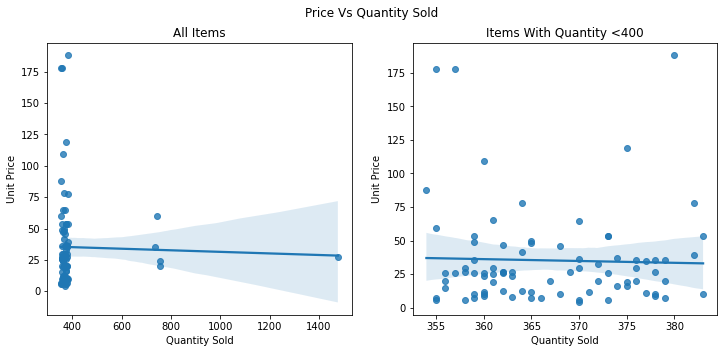

In [39]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))

sns.regplot(x="quantity", y="unitprice", data=df1_price_quantity, ax=axes[0])
sns.regplot(
    x="quantity",
    y="unitprice",
    data=df1_price_quantity[(df1_price_quantity['quantity'] < 400) & (df1_price_quantity['quantity'] > 350)],
    ax=axes[1])

fig.suptitle("Price Vs Quantity Sold")
axes[0].set_title("All Items")
axes[1].set_title("Items With Quantity <400")
for ax in axes:
    ax.set_xlabel("Quantity Sold")
    ax.set_ylabel("Unit Price")
plt.show()

#### 3.2. Price Changes
Q: Do price changes/revisions affect an item's sales?

A: Insufficient data (no dish had a price revision during the specified period)

In [40]:
df1_price_changes = dataset1[['itemdescription', 'unitprice']].drop_duplicates()
print(
    f"{len(df1_price_changes['itemdescription'].unique())} item(s) had their prices changed"
        if len(df1_price_changes[df1_price_changes.duplicated()]) > 0
        else "No dish had a price revision during the specified period"
)

No dish had a price revision during the specified period


In [41]:
dataset2

,orderdate,billnumber,deliverycharge,gst,deliverytotal,paymentmode,deliverytimetaken,customerrating_food,customerrating_delivery
0,2022-01-02,D0201202210000,17.0,1.19,18.19,Cash on Delivery,25,5,5
1,2022-01-02,D0201202210001,17.0,1.19,18.19,Debit Card,25,5,5
2,2022-01-02,D0201202210002,26.0,1.82,27.82,Credit Card,38,4,3
3,2022-01-02,D0201202210003,17.0,1.19,18.19,Debit Card,25,4,4
4,2022-01-02,D0201202210004,17.0,1.19,18.19,Credit Card,25,4,4
...,...,...,...,...,...,...,...,...,...
5776,2023-02-02,D0202202310535,32.0,2.56,34.56,Debit Card,48,3,3
5777,2023-02-02,D0202202310536,25.0,2.00,27.00,Debit Card,37,4,5
5778,2023-02-02,D0202202310537,15.0,1.20,16.20,Credit Card,22,4,5
5779,2023-02-02,D0202202310538,18.0,1.44,19.44,Debit Card,26,5,4


### 4. Payment Mode

#### 4.1. Overall
Q: Which payment modes do consumers prefer?

A: Clear preference for cashless payment (credit and debit cards) with 93% of payments being made this way

*Recommendation: could adopt other forms of cashless payment (e.g. PayNow, PayLah), after considering the costs of doing so*

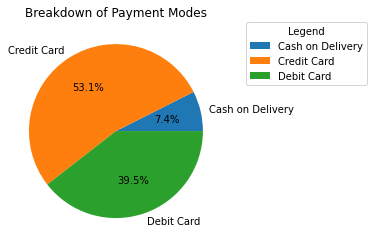

In [42]:
df2_payment = dataset2[['billnumber', 'paymentmode']] \
    .drop_duplicates(subset='billnumber') \
    .groupby('paymentmode') \
    .count() \
    .reset_index() \
    .rename(columns={'billnumber': 'count'})
    
ax = plt.pie(
    df2_payment['count'],
    labels=df2_payment['paymentmode'],
    autopct='%.1f%%',
)
plt.title("Breakdown of Payment Modes")
plt.legend(
    title="Legend",
    labels=df2_payment['paymentmode'],
    bbox_to_anchor=(1.1, 1),
    loc='upper left',
    borderaxespad=0
)
plt.show()

In [43]:
df_payment_cost = df_main_combined_description[['billnumber', 'foodtotal', 'deliverytotal', 'paymentmode']] \
    .assign(cost_to_customer=df_main_combined_description.eval('foodtotal + deliverytotal')) \
    .groupby(['billnumber', 'paymentmode'])['cost_to_customer'] \
    .sum() \
    .reset_index()

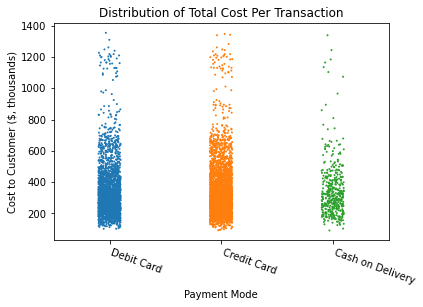

In [44]:
ax = sns.stripplot(data=df_payment_cost, x="paymentmode", y="cost_to_customer", size=2)
ax.set_title("Distribution of Total Cost Per Transaction")
plt.xticks(rotation=-20, ha='left')
plt.xlabel("Payment Mode")
plt.ylabel("Cost to Customer ($, thousands)")
plt.show()

#### 4.2. Payment Mode vs Cost to Customers
Q: Is there a correlation between payment modes and prices?

A: No correlation

In [45]:
# ROUND_TO = 1000
#     .apply(lambda x: round(float(x)/ROUND_TO)) \
df_payment_cost_mean = df_main_combined_description[['foodtotal', 'deliverytotal', 'paymentmode']] \
    .assign(cost_to_customer=df_main_combined_description.eval('foodtotal + deliverytotal')) \
    .groupby('paymentmode')['cost_to_customer'] \
    .mean() \
    .reset_index()

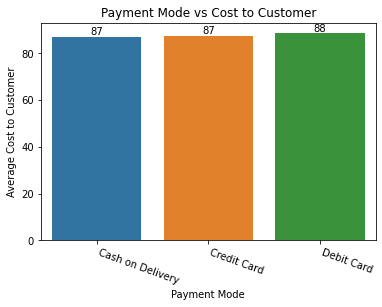

In [46]:
ax = sns.barplot(x="paymentmode", y="cost_to_customer", data=df_payment_cost_mean)

ax.set_title("Payment Mode vs Cost to Customer")
plt.xticks(rotation=-20, ha='left')
ax.set_xlabel("Payment Mode")
ax.set_ylabel("Average Cost to Customer")
ax.bar_label(ax.containers[0], fmt='%d')

plt.show()

### 5. Delivery

#### 5.1.1 Delivery Time vs Rating
Q: Do delivery times affect customer ratings?

A: No; even distribution of delivery times per customer rating.

*Recommendation: Due to different delivery distances for each customer, customers may have different expectations for each delivery timing.*

In [47]:
df_delivery_rating = df_main_combined_description[['billnumber', 'deliverytimetaken', 'customerrating_delivery', 'deliverytotal']] \
    .drop_duplicates(subset='billnumber') \
    .reset_index()

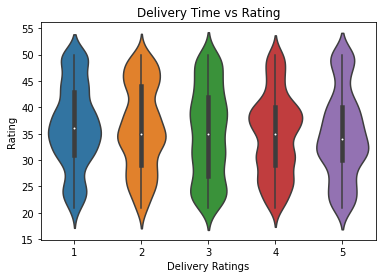

In [48]:
ax = sns.violinplot(x="customerrating_delivery", y="deliverytimetaken", data=df_delivery_rating)

ax.set_title("Delivery Time vs Rating")
ax.set_xlabel("Delivery Ratings")
ax.set_ylabel("Rating")
plt.show()

#### 5.1.2 Delivery Time and Cost vs Rating
Q: Using delivery cost as an estimate for distance, do delivery times affect customer ratings?

A:
- Still no clear correlation between delivery time and cost, with roughly the same distribution of ratings across all delivery ratings
- Strong correlation between delivery time and cost, implying that this estimate is relatively accurate

*Recommendation: For more accurate results, collect data for delivery distance*

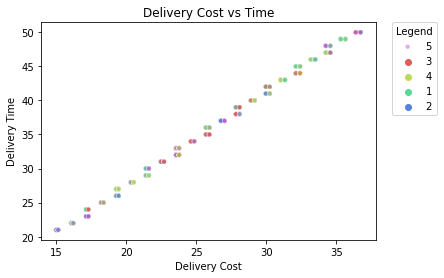

In [49]:
axes[0] = sns.scatterplot(
    x="deliverytotal",
    y="deliverytimetaken",
    hue="customerrating_delivery",
    data=df_delivery_rating,
    palette=sns.color_palette("hls", df_delivery_rating['customerrating_delivery'].nunique()),
    s=20,
    alpha=0.5
)

axes[0].set_title("Delivery Cost vs Time")
axes[0].set_xlabel("Delivery Cost")
axes[0].set_ylabel("Delivery Time")
plt.legend(
    title="Legend",
    labels=df_delivery_rating['customerrating_delivery'].unique(),
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    borderaxespad=0
)
plt.show()

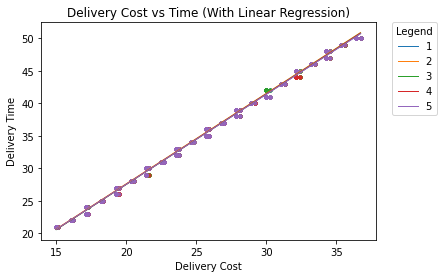

In [50]:
RATINGS = range(1,6) # df_delivery_rating['customerrating_delivery'].unique()

for i in RATINGS:
    ax = sns.regplot(
        x="deliverytotal",
        y="deliverytimetaken",
        data=df_delivery_rating[df_delivery_rating['customerrating_delivery'] == i],
        scatter_kws={'s': 10},
        line_kws={'linewidth': 1}
    )

ax.set_title("Delivery Cost vs Time (With Linear Regression)")
ax.set_xlabel("Delivery Cost")
ax.set_ylabel("Delivery Time")
plt.legend(
    title="Legend",
    labels=RATINGS,
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    borderaxespad=0
)
plt.show()

#### 5.2. Delivery Cost vs Overall Price
Q: What is the proportion of delivery fees to the total bill? Does this change over time?

A: Delivery fees take up around 8-10% of the total bill.

*Recommendation: Consider cheaper alternatives, e.g. in-house delivery vs delivery platform*

Note: Calculated post-tax as cost to customer<br>
Note: Data for Feb 2023 is incomplete and therefore was excluded

In [51]:
df_combined_bill = df_main_combined_description[['billnumber', 'foodtotal']] \
    .groupby('billnumber')['foodtotal'] \
    .sum() \
    .reset_index() \
    .merge(
        dataset2[['billnumber', 'deliverytotal']],
        how='left',
        on='billnumber'
    )

df_combined_bill_pie = df_combined_bill \
    .drop(labels='billnumber', axis=1) \
    .rename(columns={ 'foodtotal': 'Food Bill', 'deliverytotal': 'Delivery Fee'}) \
    .sum()

df_combined_bill_time = df_combined_bill \
    .merge(dataset1[['billnumber', 'orderdate']], how='left', on='billnumber') \
    .query("orderdate < '2023-02-01'") \
    .drop_duplicates()
df_combined_bill_time['mmyyyy'] = df_combined_bill_time['orderdate'].dt.strftime('%b %Y')
df_combined_bill_time = df_combined_bill_time \
    .groupby('mmyyyy') \
    .sum() \
    .reset_index()
df_combined_bill_time = df_combined_bill_time \
    .assign(percentage=df_combined_bill_time.eval('deliverytotal / (foodtotal + deliverytotal) * 100'))
df_combined_bill_time = df_combined_bill_time.iloc[pd.to_datetime(df_combined_bill_time['mmyyyy']).values.argsort()]

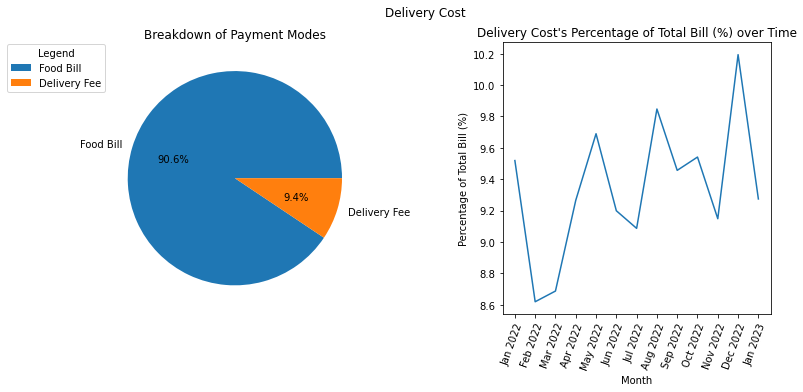

In [52]:
NUM_COLS = 2
fig, axes = plt.subplots(1, NUM_COLS, figsize=(12,5))
plt.subplots_adjust(wspace=0.5)

axes[0].pie(df_combined_bill_pie, labels=df_combined_bill_pie.index, autopct='%.1f%%')
sns.lineplot(data=df_combined_bill_time, x='mmyyyy', y='percentage', ci=None, ax=axes[1])

fig.suptitle("Delivery Cost")
axes[0].set_title("Breakdown of Payment Modes")
axes[1].set_title("Delivery Cost's Percentage of Total Bill (%) over Time")
axes[1].set_xlabel("Month")
axes[1].set_ylabel("Percentage of Total Bill (%)")

xticks = axes[1].get_xticks()
xlabels = df_combined_bill_time['mmyyyy'].unique()
axes[1].set_xticks(xticks)
axes[1].set_xticklabels(xlabels, rotation=70, rotation_mode='anchor', ha='right')

axes[0].legend(
    title="Legend",
    labels=df_combined_bill_pie.index,
    bbox_to_anchor=(-0.35, 1),
    loc='upper left',
    borderaxespad=0
)

plt.show()

# Plot for absolute values of foodtotal and deliverytotal
# sns.lineplot(data=df_combined_bill_time, x='mmyyyy', y='amount', hue='costType', ci=None, ax=axes[1])
# axes[1].set_title("Delivery Cost over Time")
# axes[1].set_xlabel("Month")
# axes[1].set_ylabel("Amount ($)")

# xticks = axes[1].get_xticks()
# xlabels = df_combined_bill_time['mmyyyy'].unique()
# axes[1].set_xticks(xticks)
# axes[1].set_xticklabels(xlabels, rotation=70, rotation_mode='anchor', ha='right')
# axes[1].legend(
#     title="Legend",
#     labels=df_combined_bill_pie.index,
#     bbox_to_anchor=(1.05, 1),
#     loc='upper left',
#     borderaxespad=0
# )

### 6. Food Rating

#### 6.1.1 By Category
Q: Which categories do customers like?

A: 
- Overall average rating of 3.3 out of 5
- Categories are virtually equally rated
- Highest-rated category is Dessert, lowest-rated is Mains & Pastas

Note: Average score is merely an estimate; it is calculated by multiplying each item/category by the food rating (for the bill it belongs to), which is then divided by the total number of items ordered. This is problematic in two ways:
1. Customer rating is for overall bill and is thus a reflection of the customer's preference of all items they ordered,  instead of items/items from a category.
2. Different items/categories are ordered in different amounts, which means more popular items/categories are subject to judgement by more customers; this difference in sample sizes means some items are judged more harshly than others (more 'judges' means a greater likelihood of having more customers that dislike the dish and are more likely to give items an extremely low score)
    - This could explain why Mains & Pastas are ordered the most but have the lowest average score while Desserts are ordered the least but have the highest average score; however, we would not know if this is the main reason unless we have more accurate data

As such, more complete data is required (e.g. for individual dishes, whether customers re-order the same item) for a more accurate picture of which categories/items customers prefer

In [53]:
def getFoodRatingDf(filterType):
    filterType = filterType.lower()
    if filterType not in ['category', 'itemdescription']: return 'Choose "category" or "itemdescription"'
    df_food_preference = df_main_combined_description[['category', 'itemdescription', 'quantity', 'customerrating_food']]
    df_food_preference = df_food_preference \
        .assign(total_score=df_food_preference.eval('quantity * customerrating_food')) \
        .groupby(filterType) \
        .sum()
    return df_food_preference \
        .assign(mean_score=df_food_preference.eval('total_score / quantity')) \
        .sort_values(by='mean_score', ascending=False) \
        .reset_index()

In [54]:
df_food_preference = getFoodRatingDf('category')
df_food_preference_sum = df_food_preference.sum()
print(f"Overall average score is {df_food_preference_sum['total_score'] / df_food_preference_sum['quantity']:.2f}")

Overall average score is 3.33


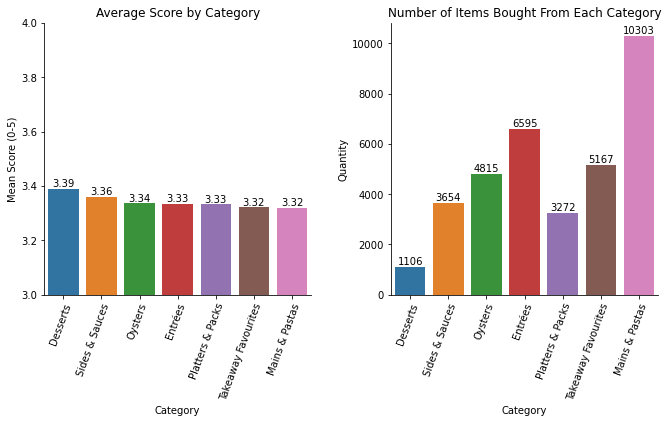

In [55]:
NUM_COLS = 2
fig, axes = plt.subplots(1, NUM_COLS, figsize=(11,5))

sns.barplot(data=df_food_preference, x="category", y="mean_score", ax=axes[0])
sns.barplot(data=df_food_preference, x='category', y="quantity", ax=axes[1])
plt.subplots_adjust(wspace=0.3)

axes[0].set_xlabel('Category')
axes[1].set_xlabel("Category")
axes[0].set_ylabel("Mean Score (0-5)")
axes[1].set_ylabel("Quantity")
axes[0].set_title("Average Score by Category")
axes[1].set_title("Number of Items Bought From Each Category")
axes[0].bar_label(axes[0].containers[0], fmt='%.2f')
axes[1].bar_label(axes[1].containers[0], fmt='%.d')
for i in range(NUM_COLS):
    axes[i].spines[['right', 'top']].set_visible(False)
    
    xticks = axes[i].get_xticks()
    xlabels = df_food_preference['category'].unique()
    axes[i].set_xticks(xticks)
    axes[i].set_xticklabels(xlabels, rotation=70, rotation_mode='anchor', ha='right')

axes[0].set(ylim=(
    math.floor(df_food_preference['mean_score'].min()),
    math.ceil(df_food_preference['mean_score'].max())
))

plt.show()

In [56]:
df_food_preference_2 = df_main_combined_description[['category', 'itemdescription', 'quantity', 'customerrating_food']] \
    .groupby('customerrating_food') \
    .sum() \
    .reset_index()

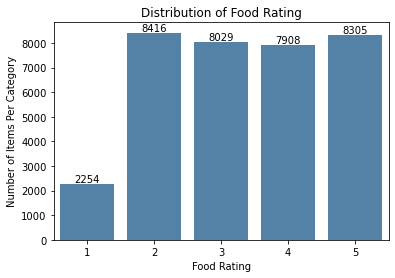

In [57]:
ax = sns.barplot(data=df_food_preference_2, x="customerrating_food", y="quantity", color='steelblue')

ax.set_title('Distribution of Food Rating')
ax.set_xlabel('Food Rating')
ax.set_ylabel("Number of Items Per Category")
ax.bar_label(ax.containers[0], fmt='%.d')

plt.show()

#### 6.1.2 By Item
Q: Which items do customers like the most/least?

A:

Top-rated dishes (highest to lowest):
1. Hot Seafood Platter (average score: 3.51)
2. Homemade Tartar Sauce  (average score: 3.50)
3. Edamame (average score: 3.48)
4. Family Pack A (average score: 3.45)
5. Ocean Trout Fish Fillets (average score: 3.44)
6. Japanese Scallop (L Size) (average score: 3.43)

Lowest-rated dishes (lowest to highest):
1. Scallop Cioppino Spaghetti (average score: 3.16)
2. Caesar Salad (average score: 3.18)
3. Butternut Pumpkin Mash  (average score: 3.19)
4. Burrata & Tomato Salad (average score: 3.19)
5. Sashimi Platter (average score: 3.21)
6. Truffle Risotto (average score: 3.22)

Note: refer to the note from section 6.1.1

In [58]:
df_item_rating = getFoodRatingDf('itemdescription')

print("Top-rated dishes (highest to lowest):")
for i in range(NUM_TOP):
    print(f"{i+1}. {df_item_rating['itemdescription'].loc[i]} (average score: {df_item_rating['mean_score'].loc[i]:.2f})")

df_item_rating = df_item_rating.sort_values(by='mean_score').reset_index(drop=True)
print("\nLowest-rated dishes (lowest to highest):")
for i in range(NUM_TOP):
    print(f"{i+1}. {df_item_rating['itemdescription'].loc[i]} (average score: {df_item_rating['mean_score'].loc[i]:.2f})")

Top-rated dishes (highest to lowest):
1. Hot Seafood Platter (average score: 3.51)
2. Homemade Tartar Sauce  (average score: 3.50)
3. Edamame (average score: 3.48)
4. Family Pack A (average score: 3.45)
5. Ocean Trout Fish Fillets (average score: 3.44)
6. Japanese Scallop (L Size) (average score: 3.43)

Lowest-rated dishes (lowest to highest):
1. Scallop Cioppino Spaghetti (average score: 3.16)
2. Caesar Salad (average score: 3.18)
3. Butternut Pumpkin Mash  (average score: 3.19)
4. Burrata & Tomato Salad (average score: 3.19)
5. Sashimi Platter (average score: 3.21)
6. Truffle Risotto (average score: 3.22)


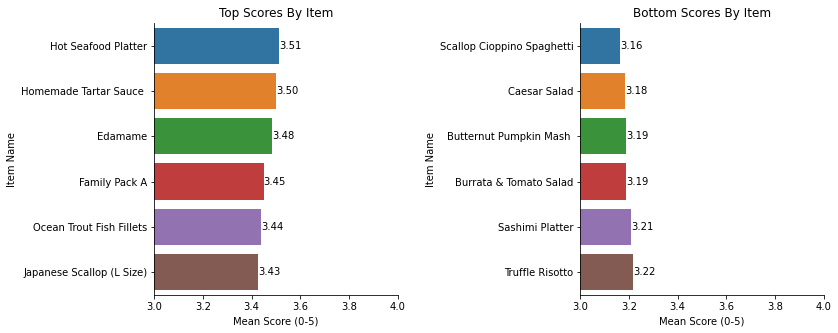

In [59]:
NUM_COLS = 2
fig, axes = plt.subplots(1, NUM_COLS, figsize=(12,5))

for i, df in enumerate((
    df_item_rating.sort_values(by='mean_score', ascending=False).reset_index(drop=True).head(NUM_TOP),
    df_item_rating.sort_values(by='mean_score').reset_index(drop=True).head(NUM_TOP)
)):
    sns.barplot(data=df, x="mean_score", y="itemdescription", orient='h', ax=axes[i])
    axes[i].set_xlabel("Mean Score (0-5)")
    axes[i].set_ylabel('Item Name')
    axes[i].bar_label(axes[i].containers[0], fmt='%.2f')
    axes[i].set(xlim=(
        math.floor(df['mean_score'].min()),
        math.ceil(df['mean_score'].max())
    ))
    axes[i].spines[['right', 'top']].set_visible(False)

plt.subplots_adjust(wspace=0.75)

axes[0].set_title("Top Scores By Item")
axes[1].set_title("Bottom Scores By Item")

plt.show()

### Bonus
Distribution of food and delivery ratings (bubble chart)

In [60]:
df_ratings_count = df_main_combined_description[['billnumber', 'customerrating_food', 'customerrating_delivery']] \
    .drop_duplicates(subset='billnumber') \
    .groupby(['customerrating_food', 'customerrating_delivery']) \
    .count() \
    .reset_index()

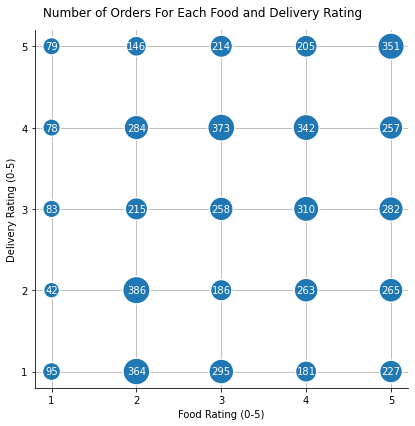

In [63]:
ax = sns.relplot(
    data=df_ratings_count,
    x="customerrating_food",
    y="customerrating_delivery",
    size="billnumber",
    sizes=(250, 750),
    palette="black",
    height=6,
    legend=None
)

for index, row in df_ratings_count.iterrows():
    x = row["customerrating_food"]
    y = row["customerrating_delivery"]
    label = row["billnumber"]
    plt.text(x, y, label, fontsize=10, ha='center', va='center', color='white')

ax.fig.suptitle("Number of Orders For Each Food and Delivery Rating")
ax.fig.subplots_adjust(top=0.925);
ax.set_xlabels("Food Rating (0-5)")
ax.set_ylabels('Delivery Rating (0-5)')
    
for ax in ax.axes.flatten():
    ax.set_axisbelow(True)
    ax.grid()
    ax.set_xticks(range(1, 6))
    ax.set_yticks(range(1, 6))

plt.show()